# Week 6: Classifications Tasks on the Iris Dataset

## 1. Decision Trees

Part of this Notebook was originally developed by [Jude Fletcher](https://eng.ox.ac.uk/people/jude-fletcher/).

Decision Trees are a non-parametric supervised machine learning technique for classification and regression. Its aim is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features or input vectors.

<h3>Dataset: Iris </h3>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Source: https://en.wikipedia.org/wiki/Iris_flower_data_set

<img src="../images/iris-data-set-01.png" width="500" style="float: left;"> 

<img src="../images/iris-species.png" width="500" style="float: left;"> 


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Setup

In [ ]:
# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 8)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

<h3>Loading and preparing the dataset.</h3>

**NOTE**: decision trees don't need feature scaling.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=77)

In [12]:
X_train[:3, :]

array([[7.1, 3. , 5.9, 2.1],
       [7.7, 2.8, 6.7, 2. ],
       [6.7, 3.1, 5.6, 2.4]])

In [8]:
y_train

array([2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2,
       1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2,
       0, 1, 1])

In [9]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Data Visualization and Exploration

Let's have a very quick overview of the data plotting the scatter matrix

In [13]:
iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
iris_df['species'] = y_train
iris_df['species'] = pd.Categorical(iris_df.species.apply(lambda y: iris.target_names[y]))
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
115,6.000,3.000,4.800,1.800,virginica
60,5.500,2.300,4.000,1.300,versicolor
106,6.400,3.100,5.500,1.800,virginica
65,4.800,3.100,1.600,0.200,setosa
20,6.600,3.000,4.400,1.400,versicolor
38,4.400,3.200,1.300,0.200,setosa
51,6.300,3.400,5.600,2.400,virginica
72,5.900,3.200,4.800,1.800,versicolor
50,6.700,3.100,4.700,1.500,versicolor
80,5.000,3.400,1.500,0.200,setosa


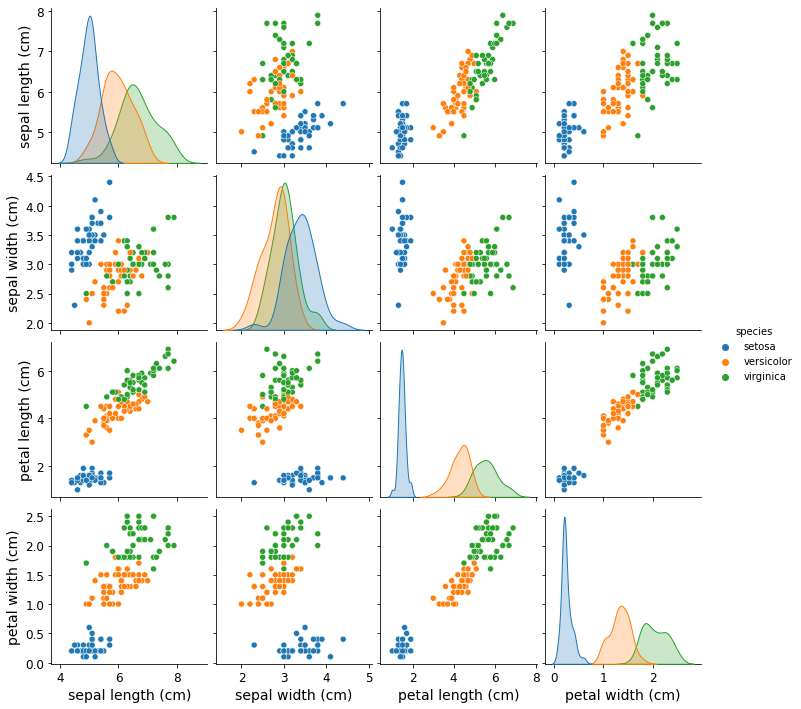

In [14]:
import seaborn as sns
pal = sns.color_palette(n_colors=3)
sns.pairplot(iris_df, hue='species')
plt.show()

**Exercise:** What can you infer from the graph?

## Decision Tree: training and evaluation

Now let's actually initialize and train our Decision Tree.

<strong>DecisionTreeClassifier</strong> is a class capable of performing multi-class classification on a dataset - i.e. capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

As with other classifiers, <strong>DecisionTreeClassifier.fit()</strong> takes as input two arrays:
1. An array X, sparse or dense, of size <i>[n_samples, n_features]</i> holding the training samples<br>
2. And an array Y of integer values, size <i>[n_samples]</i>, holding the class labels for the training samples

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier()
tree_cl.fit(X_train, y_train)

DecisionTreeClassifier()

Using the `plot_tree()` function we can plot the resulting decision tree.

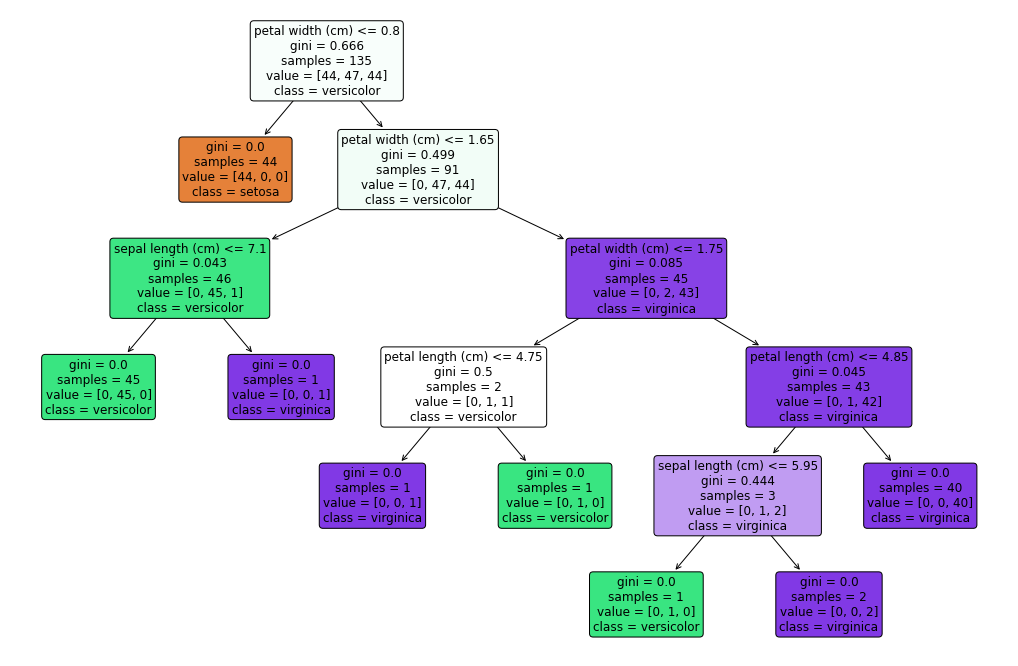

In [20]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18, 12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

### Training a Decision Tree

Given training array $\mathbf{X}$ a label vector $\mathbf{y}$, a decision tree recursively partitions the feature space such that the samples with the same labels or similar target values are grouped together. In order to do this, the training algorithm (called *CART*) aims at minimizing an inpurity metric, called "gini". The CART algorithm is a greedy algorithm, it finds the split that minimizes the gini value at the current level, it does not check if this choice will lead to the minimum gini value at the next iterations. In other words, it most often leads to a sub-optimal solution.

What is the "gini" metric? This is the impurity index of that branching point. It is zero if all the items in the current subset are assigned to a class, greater than zero otherwise. The greater the gini value, the more spread are the values across multiple classes. 

$$ gini = \sum_{j} p_j (1 - p_j) $$ 

An analogue metric is entropy often used in decision trees is entropy (aka the "log loss"), which is as well a measure of how spread are the values in multiple classes.

$$ H =  - \sum_{j} p_j \log{p_j} $$

**Exercise 1**: Evaluate your decision tree on the test set. Which performance metric would be suitable in this scenario?

In [ ]:
# Write your solution here


**Exercise 2**: Train a decision tree classifier on the iris dataset using entropy criterion and plot the resulting decision tree.

Is this model performing better than the one trained using the gini impurity number?

In [ ]:
# Write your solution here


### Decision surfaces for Decision Trees

Using the code below,we can plot the decision surface of a decision tree trained on pairs of features of the iris dataset. 

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

NOTE: we are using the whole dataset as training set in this particular example, just for illustration purposes.

In [ ]:
## Source code here: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features", size=16)
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

### Final considerations on Decision Trees

Decision Trees are *non-parametric models*. This means that the number of parameters is not pre-determined before training. This increases the risk that the model will overfit the training data (especially if you have a large number of features).

To regularize the Decision Tree you can control the following parameters:
* `max_depth`
* `min_samples_split` (minimum number of samples that a node must have before being split)
* `min_samples_leaf` (minimum number of samples a leaf node must have)
* `min_weight_fraction_leaf` (same as `min_samples_leaf` but expressed a fraction of the total number of weighted instances)
* `max_leaf_nodes` (maximum number of leaf nodes you want to allow)
* `max_features` (maximum number of features that are evaluated for splitting at each node)

Decision Trees are very easy to interpret. They are indeed a so-called explicitly interpretable ML model. However, they are very sensitive to variations in the training data and prone to overfitting. To avoid these drawbacks you can train an ensembe model built on a number of Decision Trees, a so called Random Forest.

In the next section we will see Ensembe Models and Random Forests